## Self Driving Cars

<img src = https://www.rd.com/wp-content/uploads/2022/08/self-driving-cars-GettyImages-1292394282-JVedit.jpg width=500>

An autonomous car is a vehicle capable of sensing its environment and operating without human involvement. A human passenger is not required to take control of the vehicle at any time, nor is a human passenger required to be present in the vehicle at all. An autonomous car can go anywhere a traditional car goes and do everything that an experienced human driver does.

## How do they work?

Autonomous cars rely on sensors, actuators, complex algorithms, machine learning systems, and powerful processors to execute software.

Autonomous cars create and maintain a map of their surroundings based on a variety of sensors situated in different parts of the vehicle. Radar sensors monitor the position of nearby vehicles. Video cameras detect traffic lights, read road signs, track other vehicles, and look for pedestrians. Lidar (light detection and ranging) sensors bounce pulses of light off the car’s surroundings to measure distances, detect road edges, and identify lane markings. Ultrasonic sensors in the wheels detect curbs and other vehicles when parking.

Sophisticated software then processes all this sensory input, plots a path, and sends instructions to the car’s actuators, which control acceleration, braking, and steering. Hard-coded rules, obstacle avoidance algorithms, predictive modeling, and object recognition help the software follow traffic rules and navigate obstacles.

## Self Driving Cars promises

The scenarios for convenience and quality-of-life improvements are limitless. The elderly and the physically disabled would have independence. If your kids were at summer camp and forgot their bathing suits and toothbrushes, the car could bring them the missing items. You could even send your dog to a veterinary appointment.

But the real promise of autonomous cars is the potential for dramatically lowering CO2 emissions. In a recent study, experts identified three trends that, if adopted concurrently, would unleash the full potential of autonomous cars: vehicle automation, vehicle electrification, and ridesharing. By 2050, these “three revolutions in urban transportation” could:

* Reduce traffic congestion (30% fewer vehicles on the road)
* Cut transportation costs by 40% (in terms of vehicles, fuel, and infrastructure)
* Improve walkability and livability
* Free up parking lots for other uses (schools, parks, community centers)
* Reduce urban CO2 emissions by 80% worldwide 


## Vision Transformers(ViT)

The concept of Vision Transformer (ViT) is an extension of the original concept of Transformer. It is only the application of Transformer in the image domain with slight modification in the implementation in order to handle the different data modality. More specifically, a ViT uses different methods for tokenization and embedding. However, the generic architecture remains the same. An input image is split into a set of image patches, called visual tokens. The visual tokens are embedded into a set of encoded vectors of fixed dimension. The position of a patch in the image is embedded along with the encoded vector and fed into the transformer encoder network which is essentially the same as the one responsible for processing the text input. 

<img src=https://miro.medium.com/max/1400/1*l37va2Mu8Snx6LLb13430A.png width=700/>

There are multiple blocks in the ViT encoder and each block consists of three major processing elements: Layer Norm, Multi-head Attention Network (MSP) and Multi-Layer Perceptrons (MLP). Layer Norm keeps the training process on track and let model adapt to the variations among the training images. MSP is a network responsible for generation of attention maps from the given embedded visual tokens. These attention maps help network focus on most important regions in the image such as object(s). 

## General CNN vs. ViT talk

The differences between CNNs and Vision Transformers are many and lie mainly in their architectural differences.
In fact, CNNs achieve excellent results even with training based on data volumes that are not as large as those required by Vision Transformers.
This different behaviour seems to derive from the presence in the CNNs of some inductive biases that can be somehow exploited by these networks to grasp more quickly the particularities of the analysed images even if, on the other hand, they end up limiting them making it more complex to grasp global relations.

On the other hand, the Vision Transformers are free from these biases which leads them to be able to capture also global and wider range relations but at the cost of a more onerous training in terms of data.
Vision Transformers also proved to be much more robust to input image distortions such as adversarial patches or permutations.
However, choosing one architecture over another is not always the wisest choice, and excellent results have been obtained in several Computer Vision tasks through hybrid architectures combining convolutional layers with Vision Transformers.

## Word about NVIDIA paper

<img src=https://cdn1.dotesports.com/wp-content/uploads/2020/10/02082149/nvidia-768x432.jpg width=500>

In 2016 nvidia introduced <b>End-to-End Deep Learning for Self-Driving Cars</b> paper which used 3 camera provided images as input and the steering value as output and used CNN based model in order to take the decision. 

<img src=https://developer.nvidia.com/blog/parallelforall/wp-content/uploads/2016/08/data-collection-system-624x411.png width=500>

In our own implementation we will be developing a ViT instead of the CNN used in the paper. In general self driving car technologies have advanced in the last years exponentially and most of the solutions now are based on reinforcement learning but in this implementaion we will be formulating the problem in a supervised manner with the hardware scheme presented in the paper mentioned before.

The data collection process in the original data was based on real scinareos of driving on a wide variety of roads and in a diverse set of lighting and weather conditions. We gathered surface street data in central New Jersey and highway data from Illinois, Michigan, Pennsylvania, and New York. Other road types include two-lane roads (with and without lane markings), residential roads with parked cars, tunnels, and unpaved roads. In our implementation here we will be using Udacity simulator provided specially for this purpose. 

<img src=https://techcrunch.com/wp-content/uploads/2017/02/sim_image.png width= 500/>

## Importing Necessary Libraries

In [1]:
import warnings
import cv2
import pandas as pd
import numpy  as np
from PIL import Image
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from sklearn.model_selection   import train_test_split

warnings.filterwarnings('ignore')
%matplotlib inline

/home/xmagneto/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
/home/xmagneto/anaconda3/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.7.0 and strictly below 2.10.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.6.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tenso

## Setting up general parameters

In [2]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 100
image_size = 240  # We'll resize input images to this size
patch_size = 30  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

## Data Preparation

In [3]:
data = pd.read_csv('data/driving_log.csv')
data.columns = ['center', 'left', 'right', 'steering', 'speed', 'throttle', 'brake']

In [4]:
data.shape

(4503, 7)

In [5]:
data.head()

,center,left,right,steering,speed,throttle,brake
0,/home/xmagneto/Documents/Self Driving Car/data...,/home/xmagneto/Documents/Self Driving Car/data...,/home/xmagneto/Documents/Self Driving Car/data...,-0.25,0.481741,0.0,0.563788
1,/home/xmagneto/Documents/Self Driving Car/data...,/home/xmagneto/Documents/Self Driving Car/data...,/home/xmagneto/Documents/Self Driving Car/data...,-0.50,0.780963,0.0,1.410751
2,/home/xmagneto/Documents/Self Driving Car/data...,/home/xmagneto/Documents/Self Driving Car/data...,/home/xmagneto/Documents/Self Driving Car/data...,-0.75,1.000000,0.0,2.519070
3,/home/xmagneto/Documents/Self Driving Car/data...,/home/xmagneto/Documents/Self Driving Car/data...,/home/xmagneto/Documents/Self Driving Car/data...,-1.00,1.000000,0.0,3.629618
4,/home/xmagneto/Documents/Self Driving Car/data...,/home/xmagneto/Documents/Self Driving Car/data...,/home/xmagneto/Documents/Self Driving Car/data...,-1.00,1.000000,0.0,4.744191


In [6]:
images=[]
steers=[]
for index, row in data.iterrows():
    center, left, right, steer = row['center'], row['left'], row['right'], row['steering']
    image=cv2.imread(np.random.choice([center, left, right]))
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image=Image.fromarray(image,'RGB')
    image=image.resize((image_size,image_size))
    images.append(np.array(image))
    steers.append(steer)

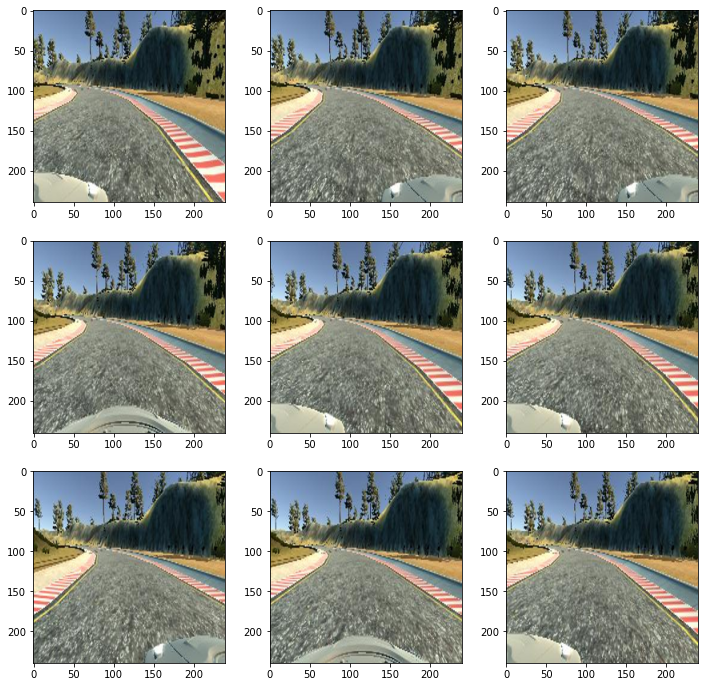

In [7]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    plt.imshow(images[i])       
plt.show()

In [5]:
images = np.array(images)
steers = np.array(steers)
x_train, x_test, y_train, y_test = train_test_split(images, steers, test_size=0.2, shuffle=True, random_state=42)

## Data augmentation

In [6]:
data_augmentation = tf.keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

## Multi-layer perceptron

In [7]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

## Implement patch creation as a layer

In [8]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 240 X 240
Patch size: 30 X 30
Patches per image: 64
Elements per patch: 2700


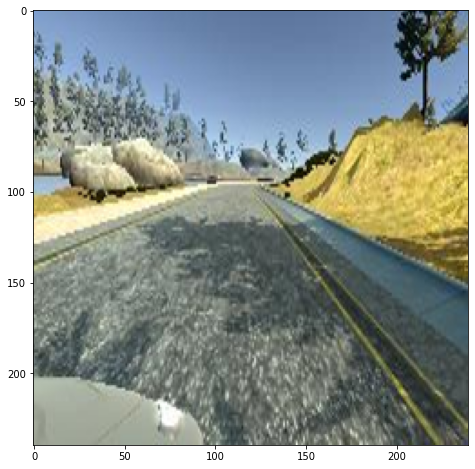

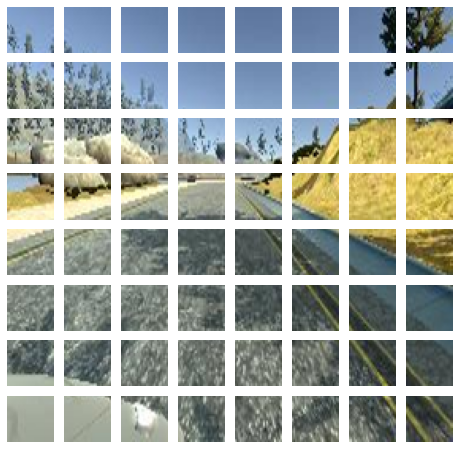

In [9]:
plt.figure(figsize=(8, 8))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(8, 8))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

## Creating the patch encoder
The PatchEncoder layer will linearly transform a patch by projecting it into a vector of size projection_dim. In addition, it adds a learnable position embedding to the projected vector.

In [10]:
class PatchEncoder(tf.keras.layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

## Building the ViT

The ViT model consists of multiple Transformer blocks, which use the layers.MultiHeadAttention layer as a self-attention mechanism applied to the sequence of patches. The Transformer blocks produce a [batch_size, num_patches, projection_dim] tensor, which is processed via a Dense head to produce the final output.

Unlike the technique described in the paper, which prepends a learnable embedding to the sequence of encoded patches to serve as the image representation, all the outputs of the final Transformer block are reshaped with layers.Flatten() and used as the image representation input to the classifier head. Note that the layers.GlobalAveragePooling1D layer could also be used instead to aggregate the outputs of the Transformer block, especially when the number of patches and the projection dimensions are large.

In [11]:
def create_vit_classifier():
    inputs = layers.Input(shape=(240, 240, 3))
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(1)(features)
    # Create the Keras model.
    model = tf.keras.Model(inputs=inputs, outputs=logits)
    return model


In [17]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss='mean_squared_error'
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_data=(x_test, y_test),
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)

    return history

In [18]:
vit_classifier = create_vit_classifier()

In [19]:
vit_classifier.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 data_augmentation (Sequential)  (None, 240, 240, 3)  7          ['input_2[0][0]']                
                                                                                                  
 patches_2 (Patches)            (None, None, 2700)   0           ['data_augmentation[1][0]']      
                                                                                                  
 patch_encoder_1 (PatchEncoder)  (None, 64, 64)      176960      ['patches_2[0][0]']        

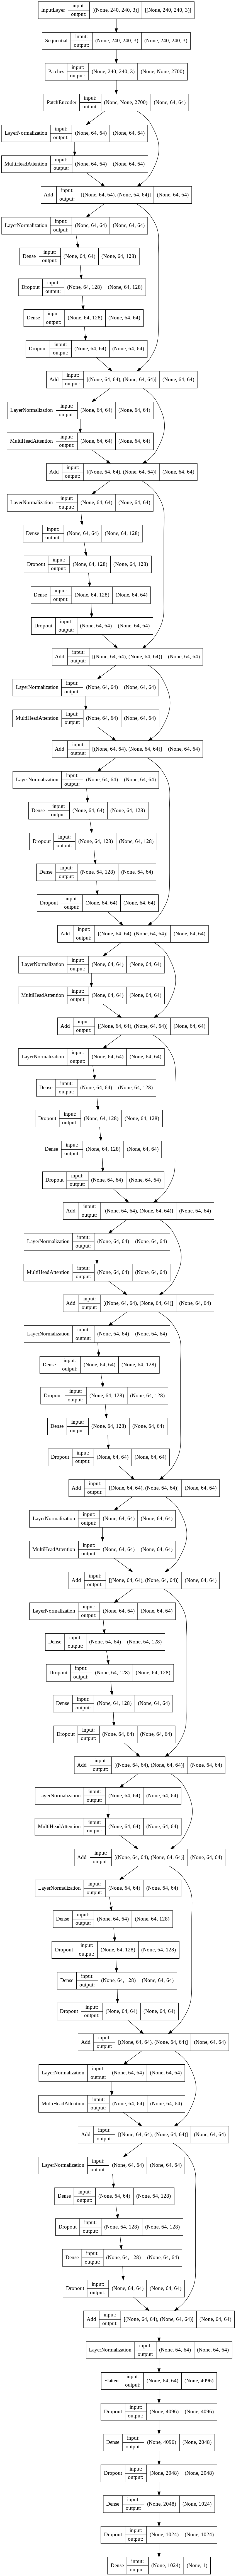

In [20]:
plot_model(vit_classifier, show_shapes=True, show_layer_names=False)

In [21]:
vit_history = run_experiment(vit_classifier)

Epoch 1/100
15/15 [==============================] - 15s 316ms/step - loss: 42.3067 - val_loss: 0.4857
Epoch 2/100
15/15 [==============================] - 3s 231ms/step - loss: 0.5457 - val_loss: 0.0477
Epoch 3/100
15/15 [==============================] - 3s 198ms/step - loss: 0.1573 - val_loss: 0.0486
Epoch 4/100
15/15 [==============================] - 3s 196ms/step - loss: 0.1020 - val_loss: 0.0531
Epoch 5/100
15/15 [==============================] - 3s 196ms/step - loss: 0.0761 - val_loss: 0.0504
Epoch 6/100
15/15 [==============================] - 3s 229ms/step - loss: 0.0634 - val_loss: 0.0433
Epoch 7/100
15/15 [==============================] - 3s 233ms/step - loss: 0.0556 - val_loss: 0.0379
Epoch 8/100
15/15 [==============================] - 3s 231ms/step - loss: 0.0498 - val_loss: 0.0338
Epoch 9/100
15/15 [==============================] - 3s 231ms/step - loss: 0.0473 - val_loss: 0.0307
Epoch 10/100
15/15 [==============================] - 4s 256ms/step - loss: 0.0449 - val_

## ViT model Evaluation

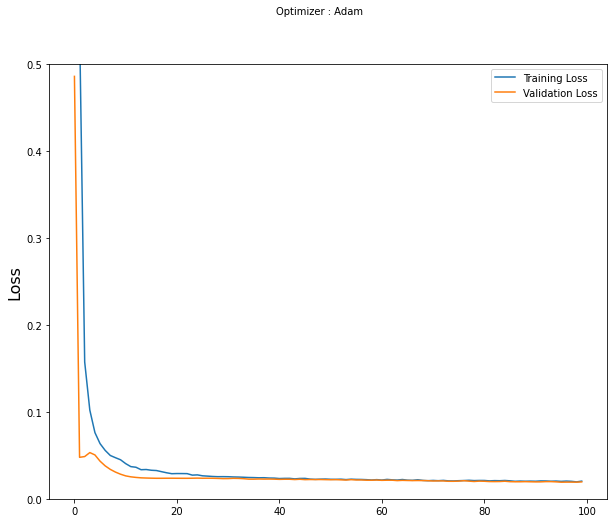

In [26]:
plt.figure(figsize=(10,8))
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.ylim(0, 0.5)
plt.plot(vit_history.history['loss'], label='Training Loss')
plt.plot(vit_history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

## Plot predictions

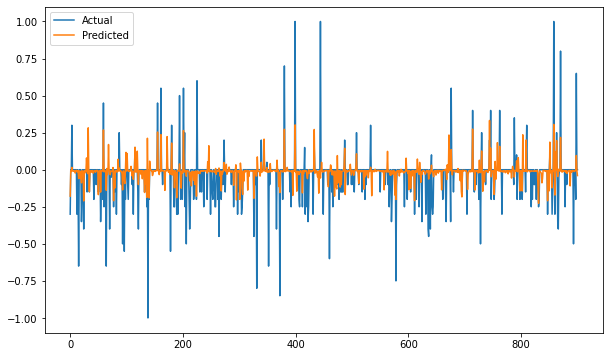

In [88]:
y_pred = vit_classifier.predict(x_test)
y_pred_n, y_test_n = [], []
for k, i in enumerate(zip(y_pred, y_test)):
    y_pred_n.append(float(i[0]))
    y_test_n.append(float(i[1]))

df = pd.DataFrame({"Y_test": y_test_n , "Y_pred" : y_pred_n})
plt.figure(figsize=(10,6))
plt.plot(df)
plt.legend(['Actual' , 'Predicted'])

## Model Saving

In [91]:
vit_classifier.save('ViTSDC_model')